In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
path='C:/Users/abhig/Desktop/AIML/ML/Project/Final Project/'
df=pd.read_csv(path+"HR_comma_sep.csv")
df_org=df.copy()

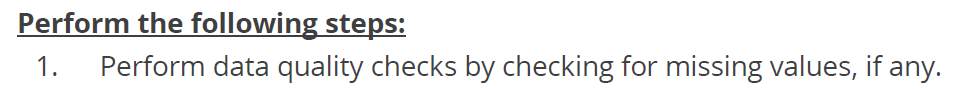

In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No Missing values is observed

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.select_dtypes(include='object').nunique()#Check for Cardinality

sales     10
salary     3
dtype: int64

In [7]:
df['sales'].unique(),df['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [8]:
df.rename(columns={'sales':'Dept'},inplace=True)# The column name "sales" is misleading for sales so converted to department for easy understanding
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Dept', 'salary'],
      dtype='object')

In [9]:
df.shape

(14999, 10)

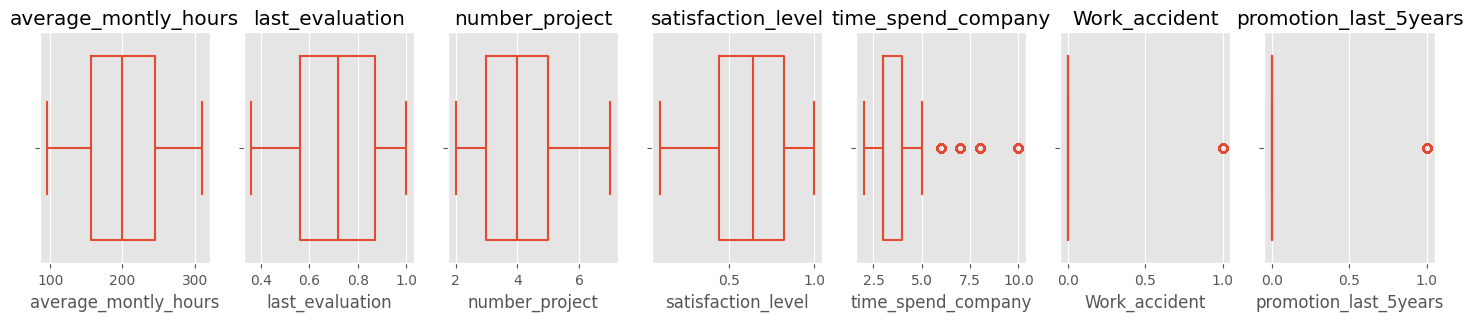

In [10]:
#outliers
num=['average_montly_hours', 'last_evaluation', 'number_project','satisfaction_level', 'time_spend_company',"Work_accident",'promotion_last_5years']
fig,axes=plt.subplots(1,7,figsize=(18,3))
for index,col in enumerate (num):
    sns.boxplot(data=df,x=df[col],fill=None,ax=axes[index])
    axes[index].set_title(f"{col}")
plt.show()

In [11]:
for i in df.select_dtypes(include='number').columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    if (df[i]>upper).any() or (df[i]<lower).any():
        print(f"{i} has outlier")
    else:
        print(f"{i} does not have outlier")

satisfaction_level does not have outlier
last_evaluation does not have outlier
number_project does not have outlier
average_montly_hours does not have outlier
time_spend_company has outlier
Work_accident has outlier
left has outlier
promotion_last_5years has outlier


Here the outlier for years work can not be removed, while the work accident and promotion in last 5 yeras are not real outliers.

In [12]:
#Here I perform winsoorize for 95% data
df_org=df.copy()
from scipy.stats.mstats import winsorize
df['time_spend_company']=winsorize(df['time_spend_company'],limits=[0.05,0.05])
df_org.shape,df.shape# no values are removed

((14999, 10), (14999, 10))

No data is lost, but the extreme values are reduced for analysis

Text(0.5, 1.0, 'Time_spend_company after winsorize')

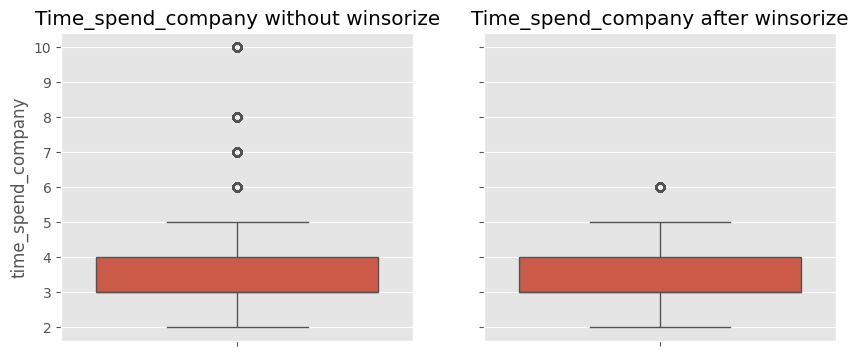

In [13]:
#SHowing the outliers side by side 

fig,axes=plt.subplots(1,2,figsize=(10,4),sharey=True)

sns.boxplot(data=df_org,y='time_spend_company',ax=axes[0])
axes[0].set_title("Time_spend_company without winsorize")

sns.boxplot(data=df,y='time_spend_company',ax=axes[1])
axes[1].set_title("Time_spend_company after winsorize")

In [14]:
#Find the duplicates and remove
df=df.drop_duplicates()
df.shape

(11991, 10)

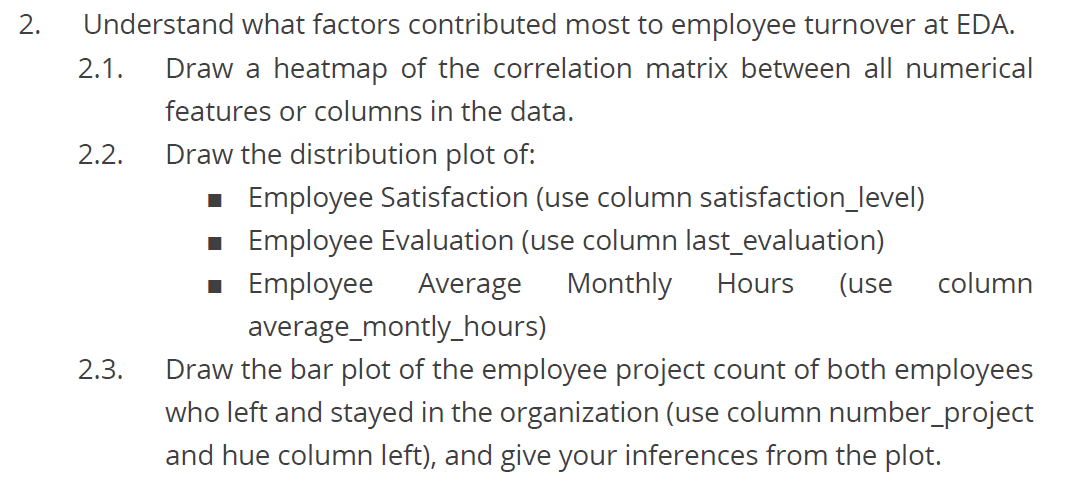

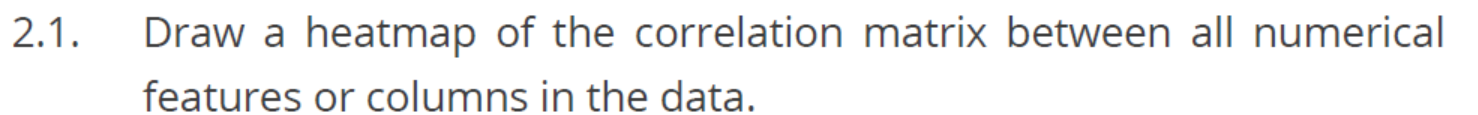

In [15]:
df.info()#Checking the data types

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Dept                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


''

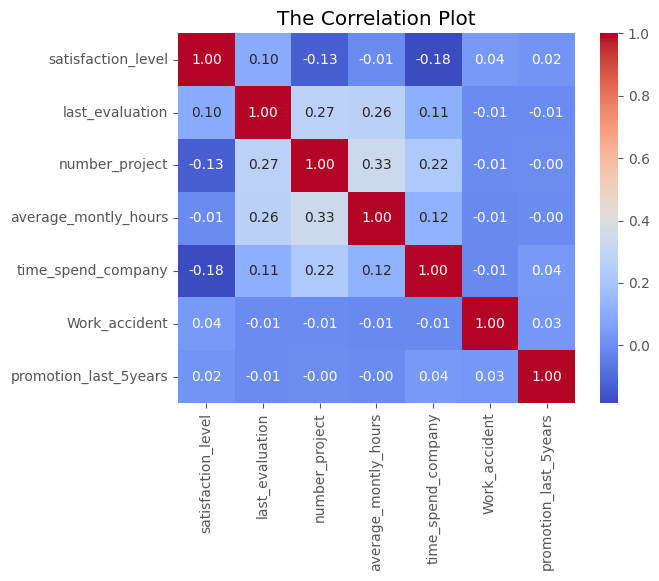

In [16]:
#Correlation Plot
num=df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years']]
corr=num.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("The Correlation Plot")
;

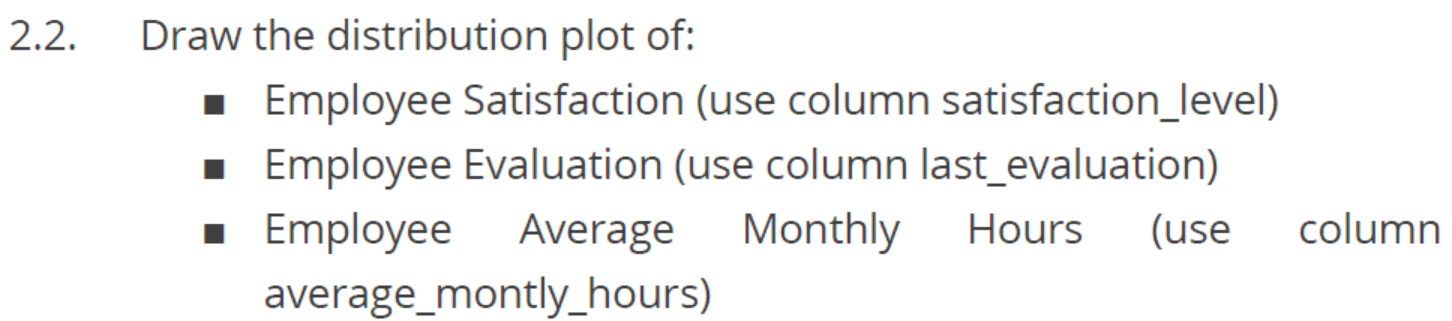

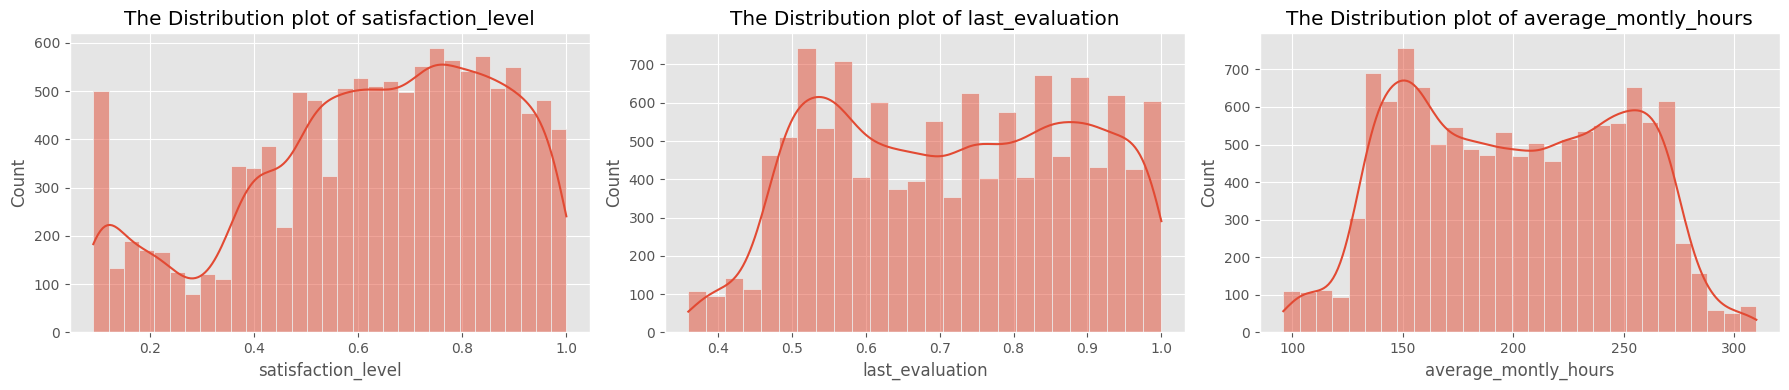

In [17]:
col=['satisfaction_level', 'last_evaluation', 'average_montly_hours']
df1=df[col]
fig,axes=plt.subplots(1,3,figsize=(18,4))
for index,column in enumerate(df1.columns):
    sns.histplot(data=df1,x=column,kde=True,ax=axes[index])
    axes[index].set_title(f"The Distribution plot of {column}")
plt.tight_layout()
plt.show()

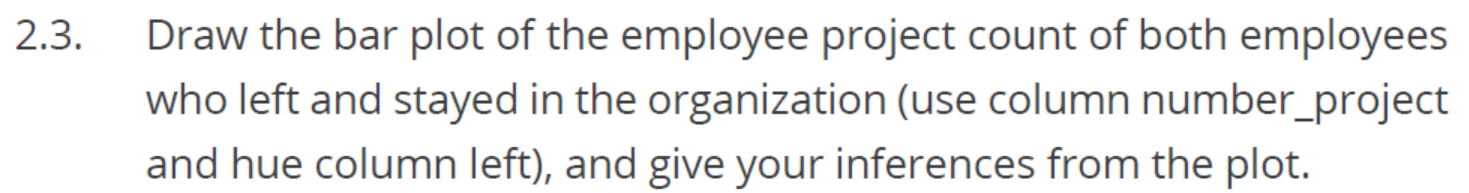

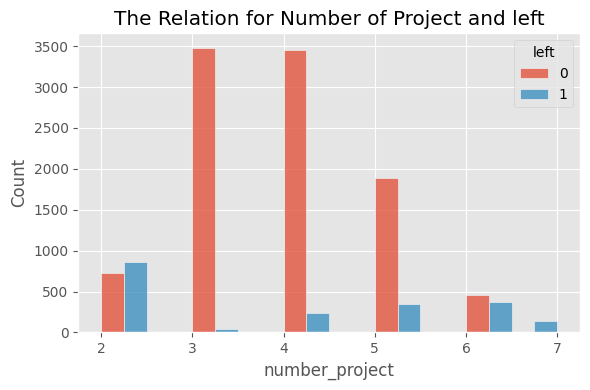

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='number_project',hue='left',multiple='dodge',binwidth=.5)
plt.title("The Relation for Number of Project and left")
plt.tight_layout()
plt.show()

Here it seems as project number increases the count of employess leaving the orgalization increases proportionaly. After it reachs 6 project, all employees have left. However, at low project number (2 projects) it seems employee turn over is high. The reason of the employees leaving may not be directly related to number of projects being handled.

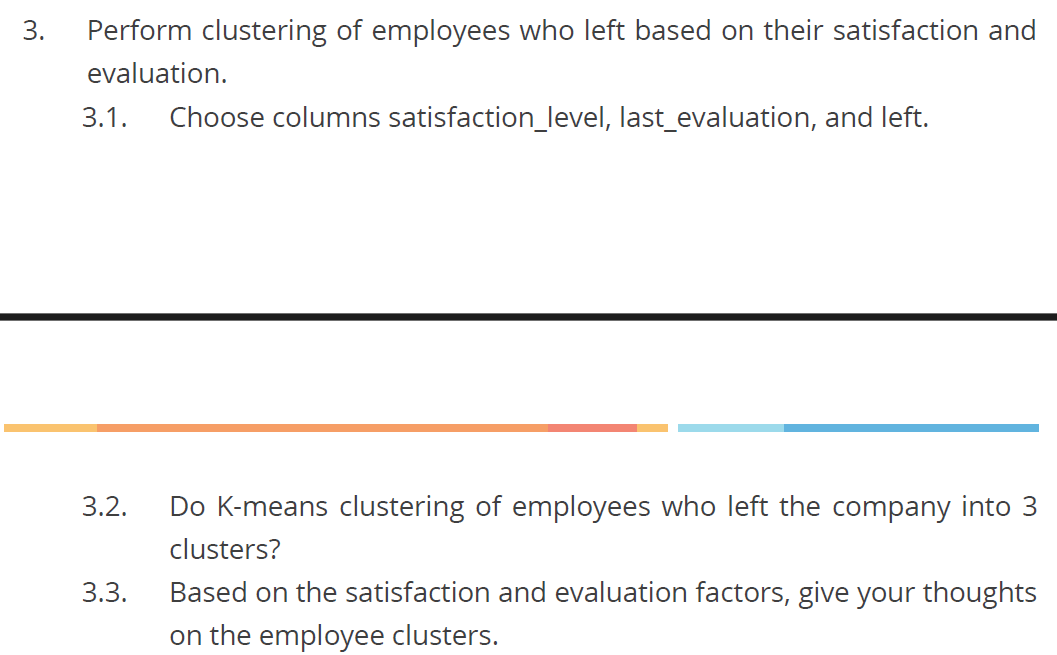

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Dept', 'salary'],
      dtype='object')

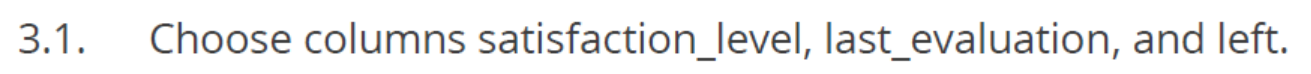

In [20]:
df_left=df[df['left']==1]
df3=df_left[['satisfaction_level', 'last_evaluation','left']]
x_value=df3.drop(columns='left',axis=1)
x_value.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


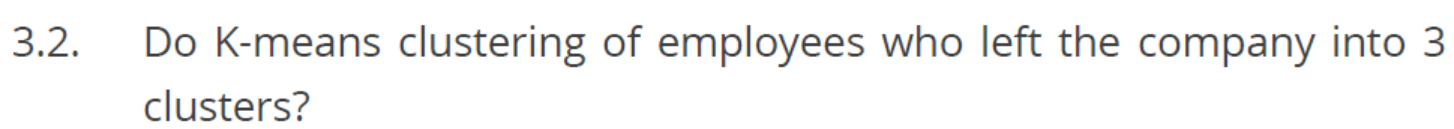

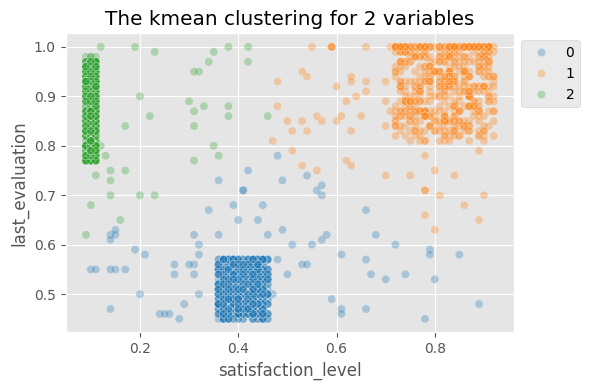

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_scaled=SS.fit_transform(x_value)

km=KMeans(n_clusters=3,random_state=42)
cluster=km.fit_predict(x_scaled)
x_value['cluster']=cluster

plt.figure(figsize=(6,4))
sns.scatterplot(data=x_value,x='satisfaction_level',y='last_evaluation',hue='cluster',alpha=0.3,palette='tab10')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.title("The kmean clustering for 2 variables")
plt.tight_layout()
plt.show()


The cluster 0 (blue) is the people who are not that satisfied, also did not have great last evaluation.
The cluster 1 (orange) is the group of employees who were satisfied and high performing. There may be some reason, like they may have lot of projects to handle, or got better opportunity from other company, so they left.
The cluster 2 (green) are the employee who are not satisfied, but they are had good report in last_evaluation. This group of people might be looking for some changes in the organization, or salary. They might have left to similar opportunility without significant economic gain as they were not happy in the company.

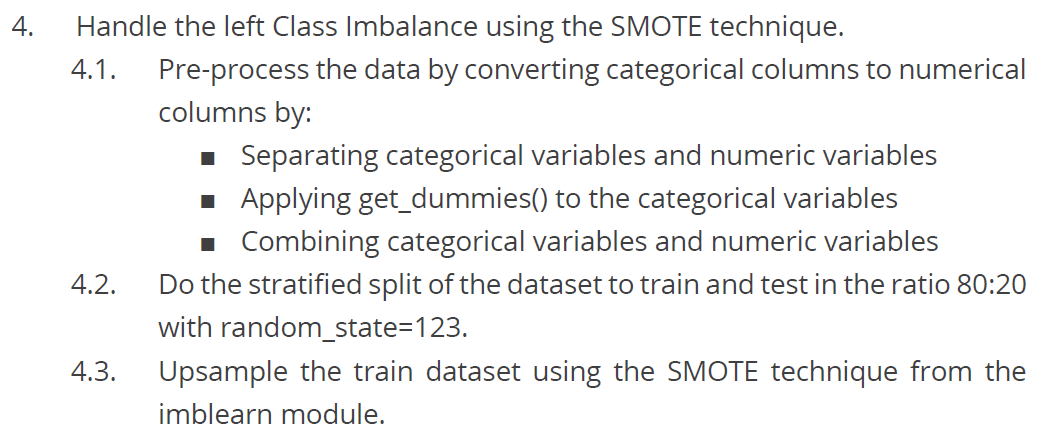

In [22]:
cat=df.select_dtypes(include='object')#Categorical columns
num=df.select_dtypes(exclude='object')#Numerical columns

In [23]:
#Checking Cardinality
for i in [df.select_dtypes(include='object').columns]:
    print(f"{df[i].nunique()}")


Dept      10
salary     3
dtype: int64


In [24]:
df['Dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [25]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

For Dept we can do get_dummies, and for salary it is ordinal encoding

In [26]:
df=pd.get_dummies(df,columns=['Dept'],dtype=int)

In [27]:
df['salary']=df['salary'].map({'low':1,'medium':2,'high':3})

In [28]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


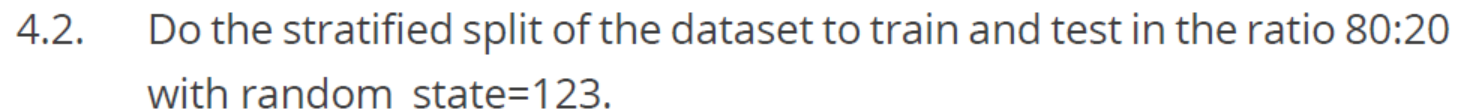

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['left'],axis=1)
y=df['left']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape# Finding the data splitting and number of data in each category

((9592, 18), (2399, 18), (9592,), (2399,))

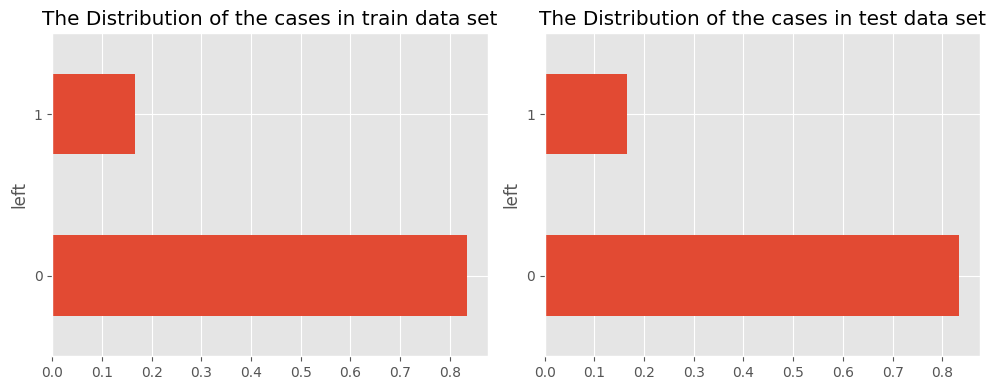

In [31]:
fig,axes=plt.subplots(1,2,figsize=(10,4))

y_train.value_counts(normalize=True).plot(kind='barh',ax=axes[0])
axes[0].set_title("The Distribution of the cases in train data set")

y_test.value_counts(normalize=True).plot(kind='barh',ax=axes[1])
axes[1].set_title("The Distribution of the cases in test data set")

plt.tight_layout()

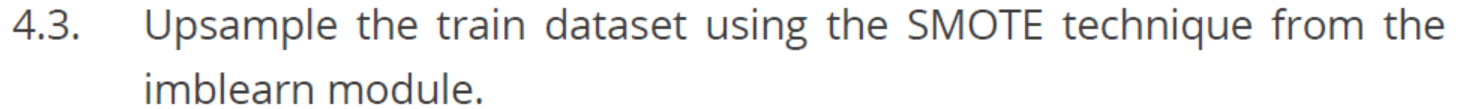

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss=StandardScaler()
x_scaled=ss.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=123,stratify=y)

sm=SMOTE(random_state=123)
x_train_resampled,y_train_resampled=sm.fit_resample(x_train,y_train)
x_train_resampled.shape,y_train_resampled.shape #Note the SMOTE should be done after splitting the data into x and y to prevent data leakage.


((15998, 18), (15998,))

Text(0.5, 1.0, 'The traindata set before SMOTE')

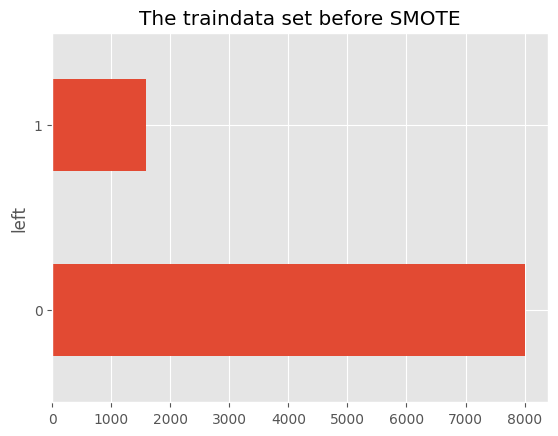

In [33]:
y_train.value_counts().plot(kind='barh')#Without upsampling
plt.title("The traindata set before SMOTE")

Text(0.5, 1.0, 'The dataset after SMOTE')

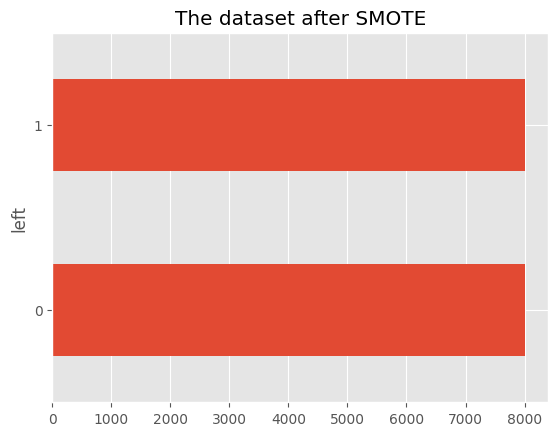

In [34]:
y_train_resampled.value_counts().plot(kind='barh')#After Upsampling
plt.title("The dataset after SMOTE")

Here the sample has been upsampled for the low category

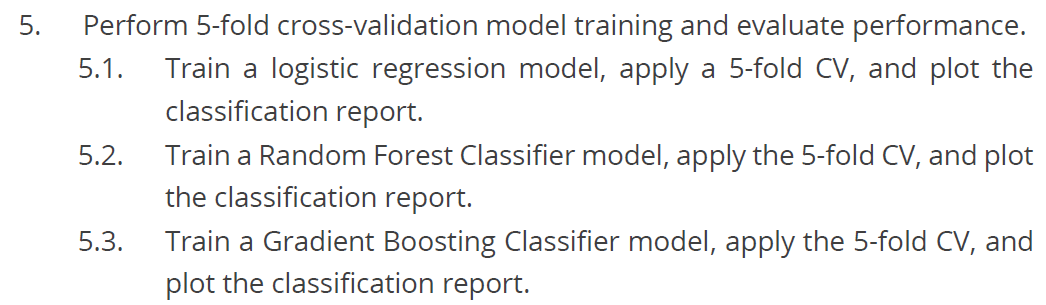

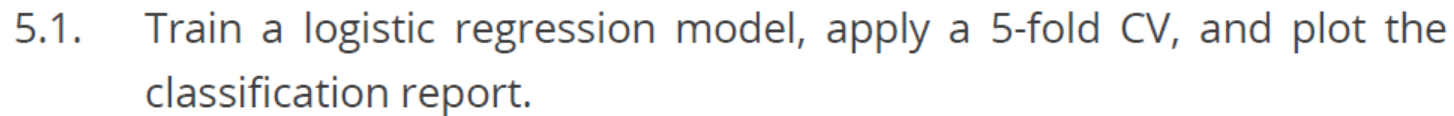

In [35]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

RF=LogisticRegression(random_state=123)#Load Model
kcv=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)#Load Cross validation
param_grid = {'C': [0.01, 0.1, 1, 10],'penalty': ['l1', 'l2'],'solver': ['liblinear', 'saga'],'class_weight': ['balanced', None],'max_iter': [500, 1000]}

grid=GridSearchCV(RF,param_grid,cv=kcv,scoring='f1',n_jobs=-1,verbose=1)
grid.fit(x_train_resampled,y_train_resampled)#Fit model

best_parameter=grid.best_params_
print(f"The Best Parameter is {best_parameter}")
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)

cml=confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cml.ravel()

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("\n Test Set Performance Metrics:")
print(f"Accuracy : {acc:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
The Best Parameter is {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}

 Test Set Performance Metrics:
Accuracy : 0.77
F1 Score : 0.55
Precision: 0.41
Recall   : 0.85
TP: 339, TN: 1512, FP: 489, FN: 59
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2001
           1       0.41      0.85      0.55       398

    accuracy                           0.77      2399
   macro avg       0.69      0.80      0.70      2399
weighted avg       0.87      0.77      0.80      2399



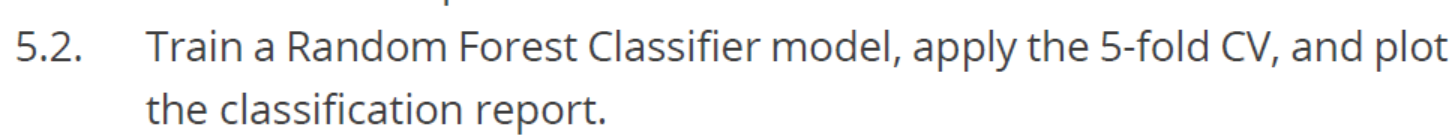

In [36]:
df_org.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Dept', 'salary'],
      dtype='object')

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# Copy and preprocess
dfr = df_org.copy()
dfr = pd.get_dummies(dfr, columns=['Dept'], dtype=int)
dfr['salary'] = dfr['salary'].map({'low': 1, 'medium': 2, 'high': 3})

# Split features and label
x = dfr.drop(columns=['left'])
y = dfr['left']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# SMOTE on training data,focus on train data only to prevent data leakage
sm = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

# Scaling
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train_resampled)
x_test_scaled = ss.transform(x_test)

# Model and GridSearchCV
modelr = RandomForestClassifier(random_state=123)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
param = {'n_estimators': [100, 200, 500],'max_depth': [10, 20, None],'min_samples_split': [2, 5],'min_samples_leaf': [3, 5, 10],'bootstrap': [True, False]}
grid = GridSearchCV(modelr, param, cv=cv, scoring='f1', n_jobs=-1, verbose=3)
grid.fit(x_train_scaled, y_train_resampled)

# Finding the best model and condition
best_model_r = grid.best_estimator_
print(f"The best parameter is {grid.best_params_}")
print(f"The best cross-validated F1 score is {grid.best_score_:.4f}")

# Predictions for y based on the model
y_pred = best_model_r.predict(x_test_scaled)
y_train_pred = best_model_r.predict(x_train_resampled)

# Confusion Matrix
cmr = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmr.ravel()
print(f"The TN, FP, FN, TP are: {tn}, {fp}, {fn}, {tp}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score (Test): {f1_score(y_test, y_pred):.4f}")
print(f"F1 Score (Train): {f1_score(y_train_resampled, y_train_pred):.4f}")

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
The best parameter is {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
The best cross-validated F1 score is 0.9770


c:\Users\abhig\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The TN, FP, FN, TP are: 3402, 27, 45, 1026
Accuracy: 0.9840
F1 Score (Test): 0.9661
F1 Score (Train): 0.0459
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.97      0.96      0.97      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



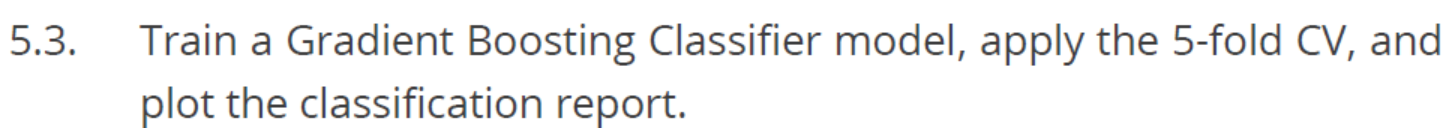

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# Copy and preprocess
dfg = df_org.copy()
dfg = pd.get_dummies(dfg, columns=['Dept'], dtype=int)
dfg['salary'] = dfg['salary'].map({'low': 1, 'medium': 2, 'high': 3})

# Split features and label
x = dfg.drop(columns=['left'])
y = dfg['left']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# SMOTE on training data,focus on train data only to prevent data leakage
sm = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

# Scaling
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train_resampled)
x_test_scaled = ss.transform(x_test)

# Model and GridSearchCV
model = GradientBoostingClassifier(random_state=123)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

param = {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [3, 5], 'min_samples_split': [2, 5],'min_samples_leaf': [1, 3, 5],'max_features': ['sqrt', 'log2', None]}
grid = GridSearchCV(model, param, cv=cv, scoring='f1', n_jobs=-1, verbose=3)
grid.fit(x_train_scaled, y_train_resampled)

# Finding the best model and condition
best_model = grid.best_estimator_
print(f"The best parameter is {grid.best_params_}")
print(f"The best cross-validated F1 score is {grid.best_score_:.4f}")

# Predictions for y based on the model
y_pred = best_model.predict(x_test_scaled)
y_train_pred = best_model.predict(x_train_resampled)

# Confusion Matrix
cmg= confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmg.ravel()
print(f"The TN, FP, FN, TP are: {tn}, {fp}, {fn}, {tp}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score (Test): {f1_score(y_test, y_pred):.4f}")
print(f"F1 Score (Train): {f1_score(y_train_resampled, y_train_pred):.4f}")

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
The best parameter is {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
The best cross-validated F1 score is 0.9793
The TN, FP, FN, TP are: 3381, 48, 58, 1013
Accuracy: 0.9764
F1 Score (Test): 0.9503
F1 Score (Train): 0.0101
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3429
           1       0.95      0.95      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



c:\Users\abhig\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


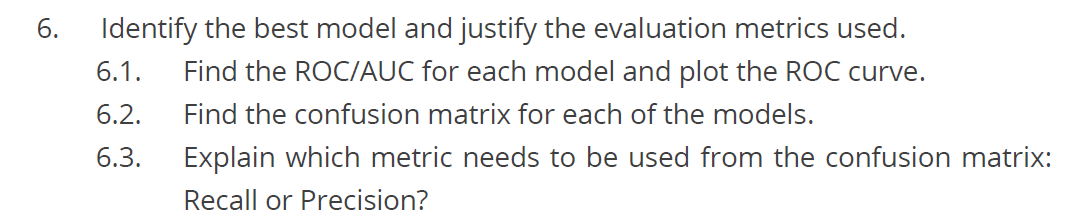

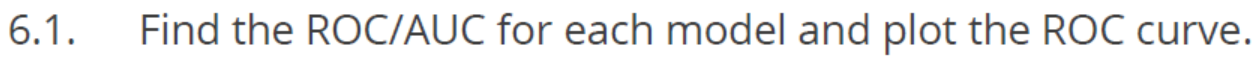

Logistic Regression: AUC-ROC Score = 0.8188
Random Forest: AUC-ROC Score = 0.9937
Gradient Boosting: AUC-ROC Score = 0.9882


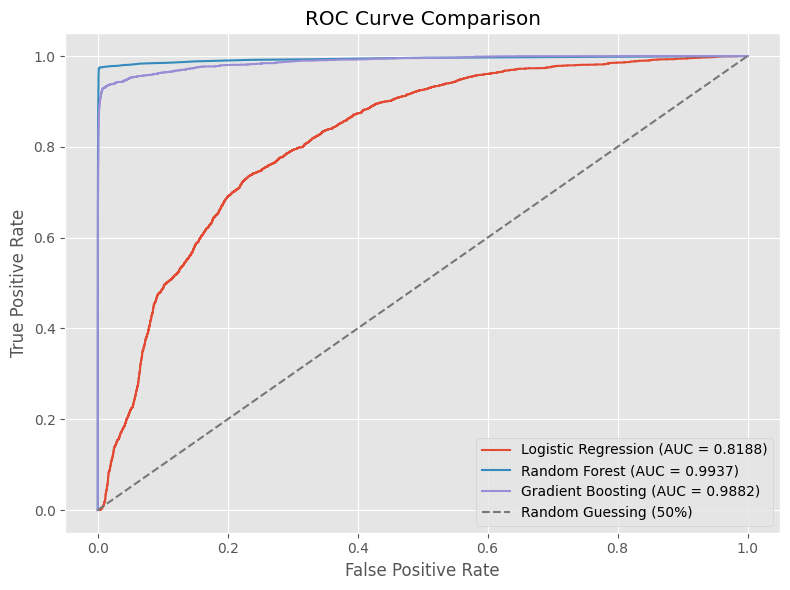

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=123)
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
plt.figure(figsize=(8, 6))

# Loop through models
for name, model in models.items():
    y_pred_proba = cross_val_predict(model, x,y, cv=cv, method='predict_proba')[:, 1]
    auc = roc_auc_score(y, y_pred_proba)
    print(f'{name}: AUC-ROC Score = {auc:.4f}')

    # ROC curve
    fpr, tpr, threshold= roc_curve(y, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing (50%)')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


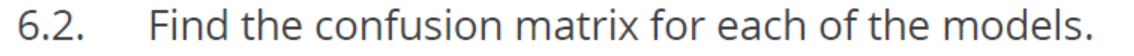

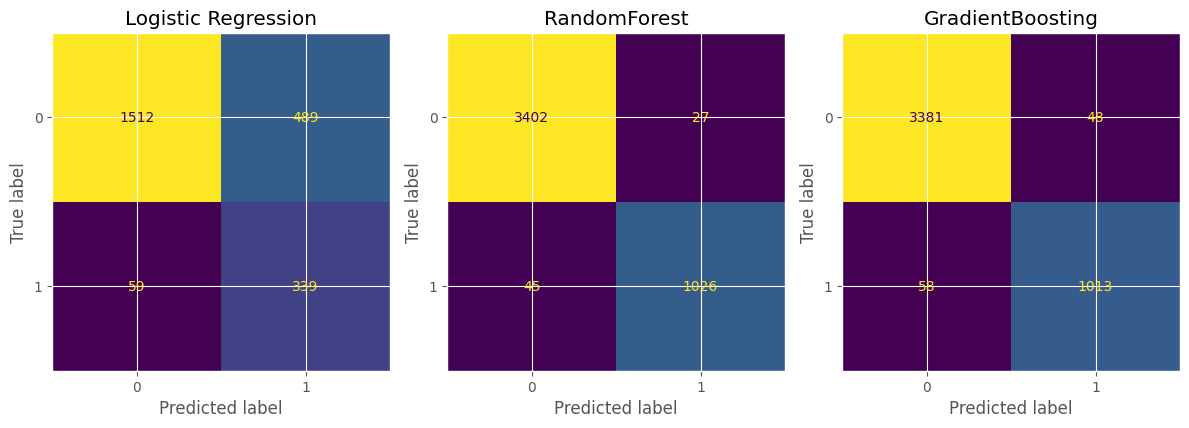

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

displ=ConfusionMatrixDisplay(cml)
dispr=ConfusionMatrixDisplay(cmr)
dispg=ConfusionMatrixDisplay(cmg)

fig,axes=plt.subplots(1,3,figsize=(12,6))

displ.plot(ax=axes[0],colorbar=False)
axes[0].set_title("Logistic Regression")
dispr.plot(ax=axes[1],colorbar=False)
axes[1].set_title("RandomForest")
dispg.plot(ax=axes[2],colorbar=False)
axes[2].set_title("GradientBoosting")

plt.tight_layout()
plt.show()

The Random Forest model is the best as the accuracy or F1 Score is the highest. Here the next best model is Gradient Boosting. In random forest model the FP (27)<48 of Gradient Boost, and FN(45)<58 of Gradient Boosting. Also the TN and TP in the model are better than Gradient boosting.In ROC curve analysis the "Area under curve" for Random Forest is the highest.

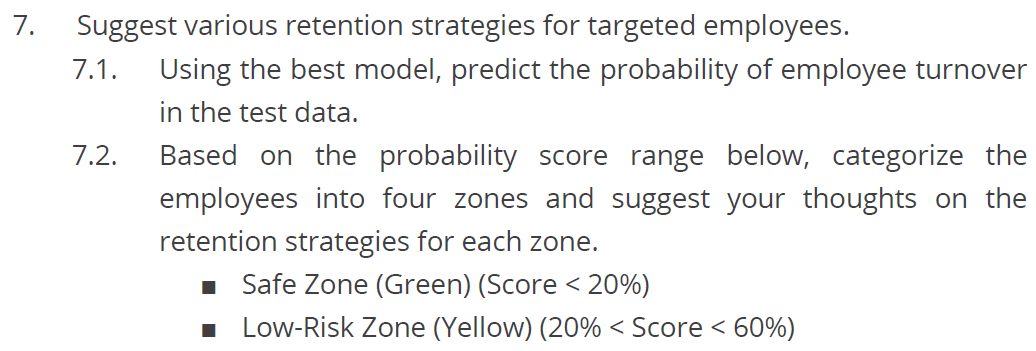

In [41]:
# Predict probabilities
y_pred_proba = best_model_r.predict_proba(x_test_scaled)

# Convert to DataFrame
df_pred = pd.DataFrame(y_pred_proba, columns=['prob_0', 'prob_1'])

df_pred.head()


,prob_0,prob_1
0,0.996650,0.003350
1,0.982594,0.017406
2,0.993707,0.006293
3,0.915393,0.084607
4,0.985427,0.014573


In [42]:
df_pred.shape

(4500, 2)

In [43]:
df_pred['zone']=pd.cut(df_pred['prob_1'],bins=[0,0.2,0.6,1],labels=['Safe Zone (Green),<20%','Low-risk Zone (yellow),20-60%','High -risk (>60%)'])

In [44]:
df_pred.head()

,prob_0,prob_1,zone
0,0.996650,0.003350,"Safe Zone (Green),<20%"
1,0.982594,0.017406,"Safe Zone (Green),<20%"
2,0.993707,0.006293,"Safe Zone (Green),<20%"
3,0.915393,0.084607,"Safe Zone (Green),<20%"
4,0.985427,0.014573,"Safe Zone (Green),<20%"


zone
Safe Zone (Green),<20%           3200
High -risk (>60%)                1023
Low-risk Zone (yellow),20-60%     256
Name: count, dtype: int64


<Axes: title={'center': 'The relative risk zone in proportion'}, ylabel='zone'>

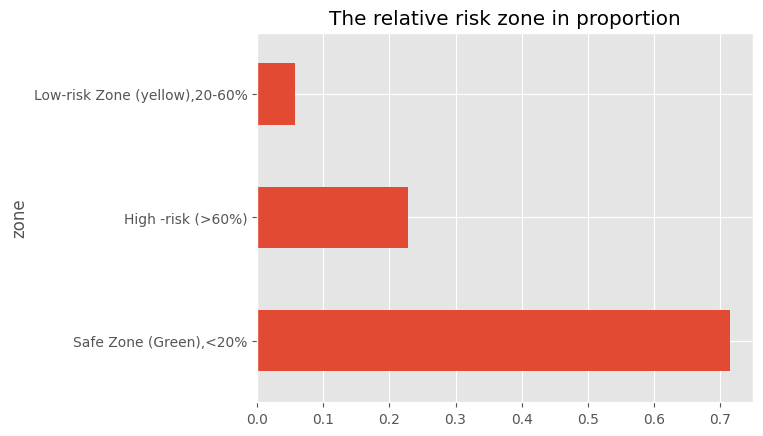

In [45]:
print(f"{df_pred['zone'].value_counts()}")
desired_order=['Safe Zone (Green),<20%','Low-risk Zone (yellow),20-60%','High -risk (>60%)']
plt.title("The relative risk zone in proportion")
df_pred['zone'].value_counts(normalize=True).plot(kind='barh')

''

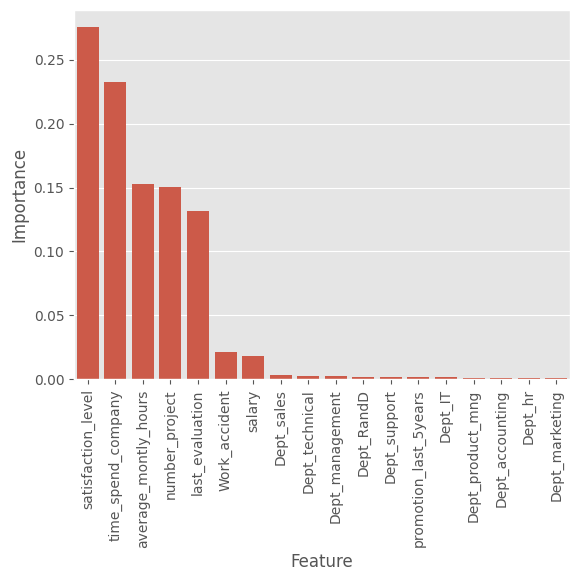

In [46]:
#Most contributing factors
#Since the model was fitted already in RandomForest and named as best_model_r, I am going to us ethe model to find important feature to provide suggestions.
# Get feature importances
important_feature = best_model_r.feature_importances_
df_imp = pd.DataFrame({'Feature': x.columns, 'Importance': important_feature})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

sns.barplot(df_imp,x='Feature',y='Importance')
plt.xticks(rotation=90)
;


Based on the model it looks like the top 5 factors are the mostly contributing.
The satisfaction level is the ultimate outcome so the real lurking variables can be time_spent, avg_monthly_hr, avg_monthly_project, and last_evaluation. 
For satisfaction level the last evaluation report for yellow or red zone employees should be considered.
For the green region the company dont need to worry as long they keep same structire.
For yellow region (20-60%) or high risk zone (>60%) the company should look if they are over worked by number of projects and work hours. So, they should be adjusted based on the satisfaction survey. It may be possible they are highly efficient employees so they get to do more projects, so to ease the load more employess should be cross trained to the skill set. The last assesment report for the subgroup should be considerd to fine tune the retention strategy for their performance and any feed back.
However, across the board all employyes should be encouraged to be more engaged by team bulilding activity, awarding by salary increases and by providing opportunity to learn new skill and grow, so that the time spent in the company wont be an issue.